In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the 'scripts' folder to the Python path
sys.path.append(os.path.abspath('../scripts'))

# Import the preprocessing functions from preprocess_data.py
from preprocess_data import preprocess_crashes_data_key_attributes, preprocess_vehicle_crash_data_key_attributes

# Load the datasets
crashes_df = pd.read_csv('../data/raw/crashdata2022-present.csv')
vehicle_crashes_df = pd.read_csv('../data/raw/vehiclecrashdata2022-present.csv')

# Apply preprocessing to the crash data
preprocessed_crashes_data = preprocess_crashes_data_key_attributes(crashes_df)
preprocessed_vehicle_data = preprocess_vehicle_crash_data_key_attributes(vehicle_crashes_df)

print("Preprocessing complete.")

Preprocessing complete.


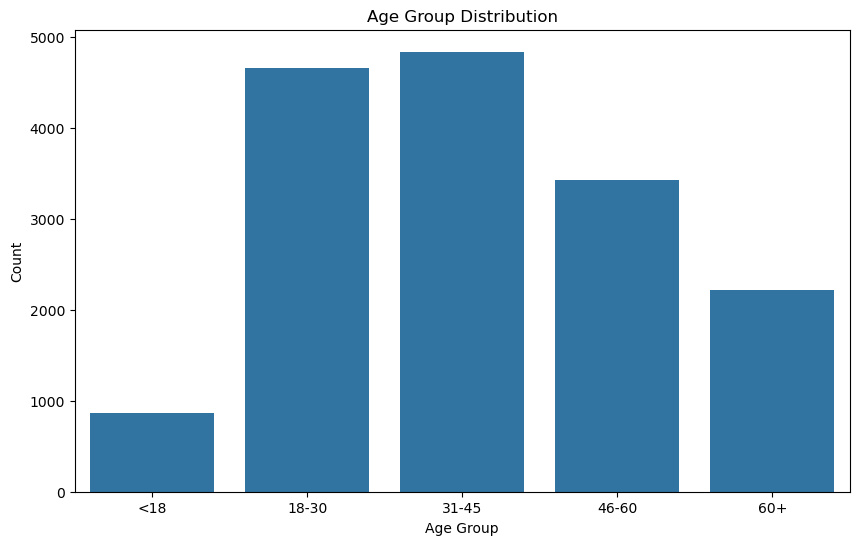

In [2]:
# Visualize Age Group Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='AgeGroup')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

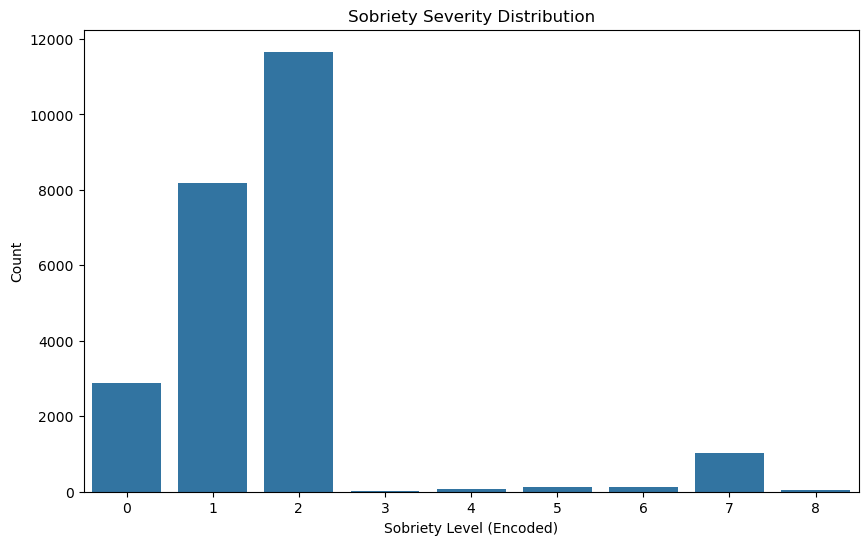

In [3]:
# Visualize Sobriety Severity Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='Sobriety_Code')
plt.title("Sobriety Severity Distribution")
plt.xlabel("Sobriety Level (Encoded)")
plt.ylabel("Count")
plt.show()

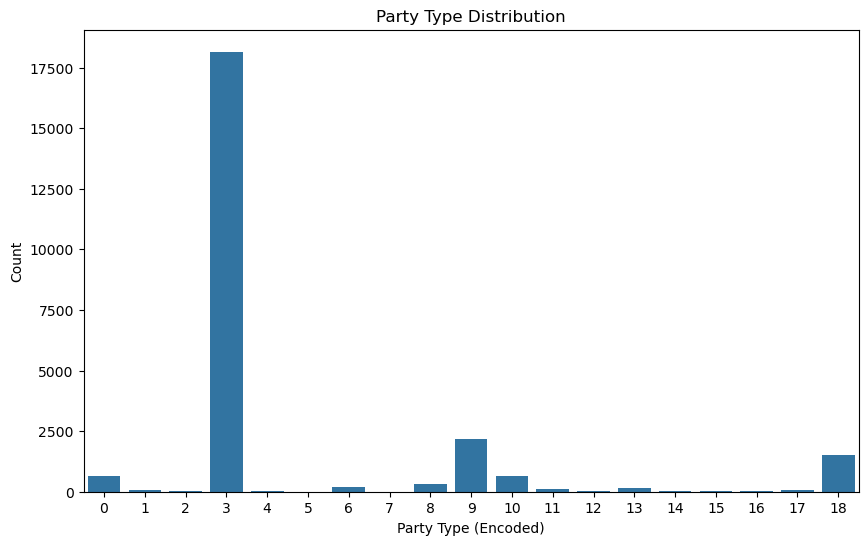

In [4]:
# Visualize Party Type Distribution from preprocessed vehicle data
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_vehicle_data, x='PartyType_Code')
plt.title("Party Type Distribution")
plt.xlabel("Party Type (Encoded)")
plt.ylabel("Count")
plt.show()

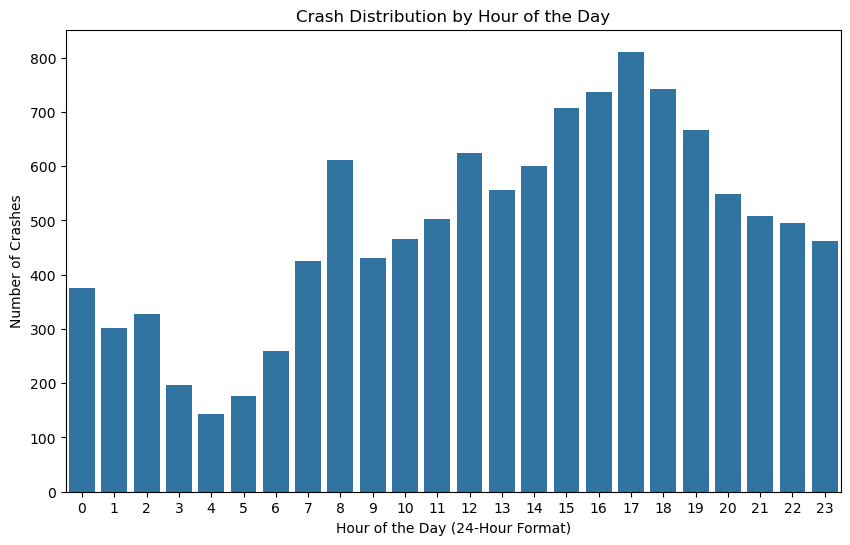

In [6]:
preprocessed_crashes_data['CrashTime'] = pd.to_datetime(preprocessed_crashes_data['CrashTime'], format='%H:%M', errors='coerce')

# Extract the hour from the 'CrashTime' column
preprocessed_crashes_data['CrashHour'] = preprocessed_crashes_data['CrashTime'].dt.hour

# Visualize the distribution of crashes by hour of the day (0-23)
plt.figure(figsize=(10,6))
sns.countplot(data=preprocessed_crashes_data, x='CrashHour', order=range(24))
plt.title("Crash Distribution by Hour of the Day")
plt.xlabel("Hour of the Day (24-Hour Format)")
plt.ylabel("Number of Crashes")
plt.xticks(range(24))  # Ensure the x-axis has tick marks for all 24 hours
plt.show()